In [102]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mpl
import seaborn as sns

%matplotlib inline
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = 16,6


# 16.1.a

Given the PnL series on $N$ investment strategies:

Align them to the average frequency of their bets (e.g. weekly observations for strategies that trade on a weekly basis). Hint: This kind of data alignment is sometimes called "downsampling".

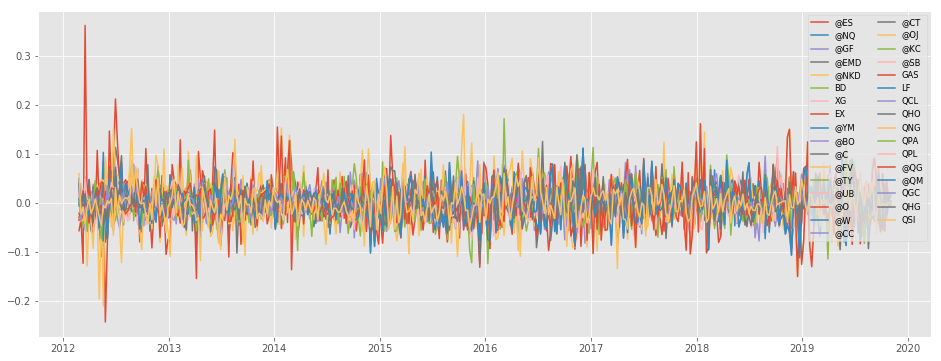

In [101]:
from load_data_orig import load_symbols_and_prices
symbols, all_data = load_symbols_and_prices(['Interest Rate', 'Equity Index', 'Energy', 'Agriculture', 'Metals'])
all_data.columns = [x[:-2] for x in all_data.columns] # strip out "#C"

weekly_data = all_data.resample('W').last()
weekly_returns = weekly_data.pct_change()[1:].dropna()

_, ax = mpl.subplots()
ax.plot(weekly_returns)
ax.legend(weekly_returns.columns, fontsize='small', ncol=2);

# 16.1.b

Given the PnL series on $N$ investment strategies:

Compute the covariance of their returns, $V$.

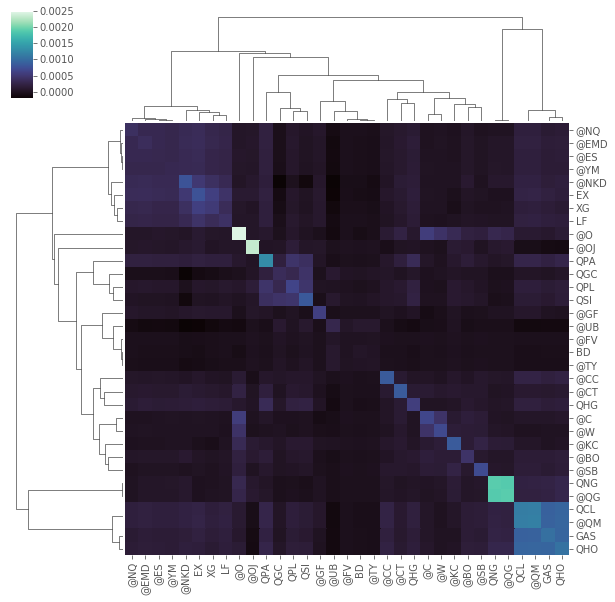

In [57]:
cov = weekly_returns.cov()
sns.clustermap(cov, method="ward", cmap="mako");

# 16.1.c

Given the PnL series on $N$ investment strategies:

Identify the hierarchical clusters among the $N$ strategies.

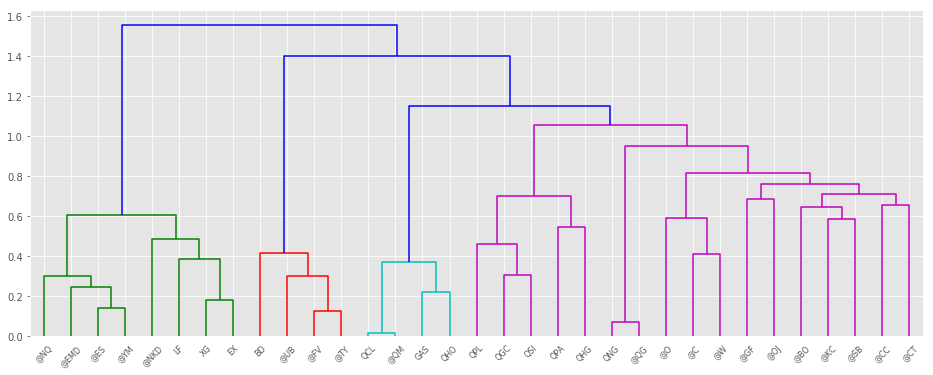

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

corr = weekly_returns.corr()
distances = np.sqrt((1 - corr) / 2)
clusters = linkage(squareform(distances), method="ward")

dendrogram(clusters, labels=weekly_returns.columns);

# 16.1.d

Given the PnL series on $N$ investment strategies:

Plot the clustered correlation matrix of the $N$ strategies.

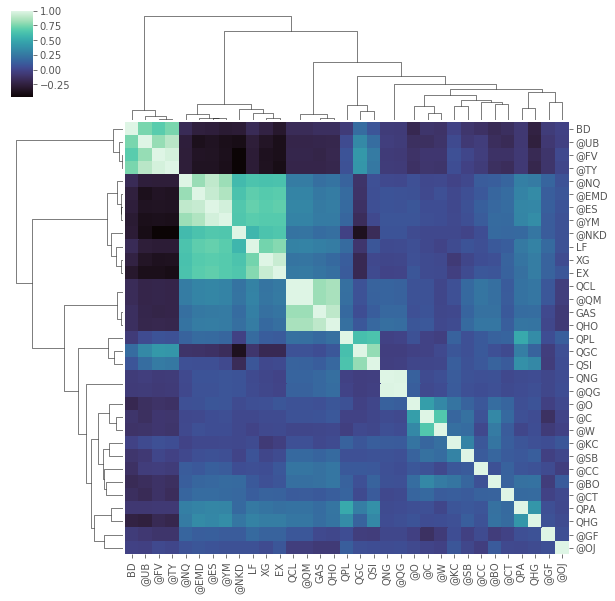

In [59]:
sns.clustermap(corr, method="ward", cmap="mako");

In [60]:
# import the algorithms from https://github.com/hudson-and-thames/mlfinlab

from cla_mlf import CLA
from hrp_mlf import HierarchicalRiskParity
from mean_variance_mlf import MeanVarianceOptimisation

# 16.2.a

Using the clustered covariance matrix $V$ from exercise 1:

Compute the HRP allocations.

In [61]:
hrp = HierarchicalRiskParity()
hrp.allocate(weekly_returns, resample_by='W')
hrp_weights = hrp.weights.sort_values(by=0, ascending=False, axis=1)

hrp_weights

,LF,@O,@FV,@W,@YM,@SB,@KC,@TY,@QG,QPA,...,QNG,EX,QSI,@GF,QPL,@EMD,QCL,@NQ,QHO,XG
0,0.145518,0.115965,0.079779,0.07439,0.051586,0.045052,0.042455,0.040436,0.034717,0.028986,...,0.011979,0.010968,0.010598,0.010285,0.010137,0.009135,0.00656,0.002577,0.002098,0.000619


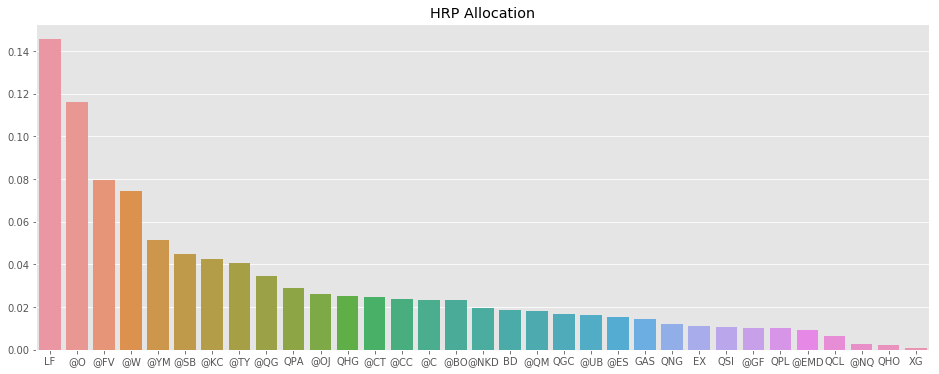

In [74]:
ax = sns.barplot(x=hrp_weights.columns, y=hrp_weights.iloc[0].values)
ax.set_title("HRP Allocation");

# 16.2.b

Using the clustered covariance matrix $V$ from exercise 1:

Compute the CLA allocations.

In [80]:
cla = CLA()
cla.allocate(asset_prices=weekly_returns, resample_by='W', solution='min_volatility')
cla_weights = cla.weights.sort_values(by=0, ascending=False, axis=1)


In [81]:
cla_weights

,@QG,@ES,@CT,QHG,QGC,@QM,QPL,QPA,QNG,QHO,...,@C,@BO,@YM,EX,XG,BD,@NKD,@EMD,@GF,QSI
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


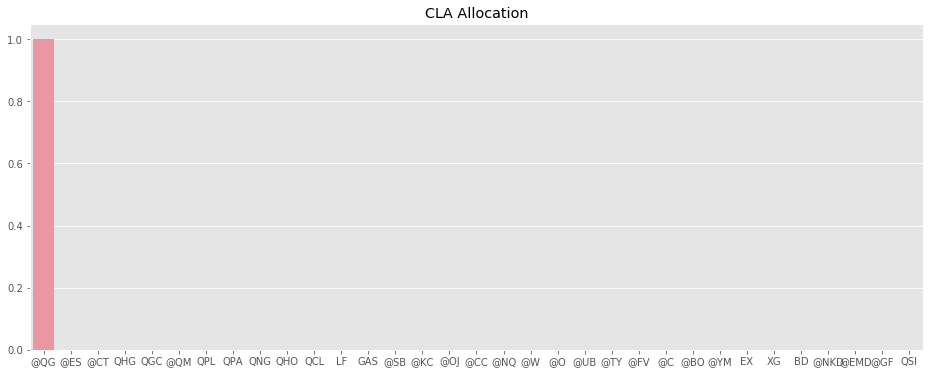

In [82]:
ax = sns.barplot(x=cla_weights.columns, y=cla_weights.iloc[0].values)
ax.set_title("CLA Allocation");

# 16.2.c

Using the clustered covariance matrix $V$ from exercise 1:

Compute the IVP allocations.

In [96]:
ivp = MeanVarianceOptimisation()
ivp.allocate(asset_prices=weekly_returns, solution='inverse_variance', resample_by='W')
ivp_weights = ivp.weights.sort_values(by=0, ascending=False, axis=1)


In [97]:
ivp_weights

,LF,@FV,@O,@W,@TY,@QG,@YM,@SB,@KC,@BO,...,@GF,@UB,EX,QSI,QPL,@EMD,QCL,@NQ,QHO,XG
0,0.132271,0.092629,0.082924,0.070596,0.065031,0.049548,0.045585,0.041067,0.03859,0.030523,...,0.012692,0.012636,0.011527,0.009366,0.008134,0.007031,0.006042,0.003387,0.001991,0.000576


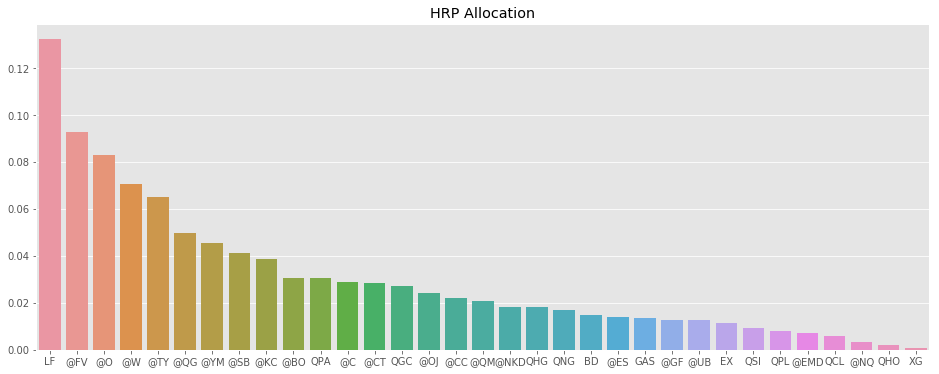

In [99]:
ax = sns.barplot(x=ivp_weights.columns, y=ivp_weights.iloc[0].values)
ax.set_title("HRP Allocation");

# 16.3.a 

Using the covariance matrix $V$ from exercise 1:

Perform a spectral decomposition $VW = W\Lambda$

# 16.3.b

Using the covariance matrix $V$ from exercise 1:

Form an array $\epsilon$ by drawing $N$ random numbers from a $U[0,1]$ distribution.

# 16.3.c

Using the covariance matrix $V$ from exercise 1:

Form an $NxN$ matrix $\tilde\Lambda$ where $\tilde\Lambda_{n,n} = N\epsilon_n \Lambda_{n,n}(\sum_{n=1}^N \epsilon_n)^{-1}, n = 1, ..., N.$

# 16.3.d

Using the covariance matrix $V$ from exercise 1:

Compute $\tilde V = W\tilde\Lambda W^{-1}$.

# 16.3.e

Using the covariance matrix $V$ from exercise 1:

Repeat exercise 2, this time using $\tilde V$ as covariance matrix. What allocation method has been most impacted by the re-scaling of spectral variances?

# 16.4

How would you modify the HRP algoritm to produce allocations that add up to 0, $|w_n| \leq 1, \forall n = 1, ..., N$?

# 16.5

Can you think of an easy way to incorporate expected returns in the HRP allocations?

**A: Create some synthetic data in line with our forecasts and append to the existing data?**